In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
import scipy.io
from skimage.draw import disk

In [2]:
PA_path = "../../data/raw/penn_action/Penn_Action/"
PA_samples_path = PA_path + "frames/"
PA_labels_path = PA_path + "labels/"
sample_names = os.listdir(PA_samples_path)

['baseball_pitch']


KeyboardInterrupt: 

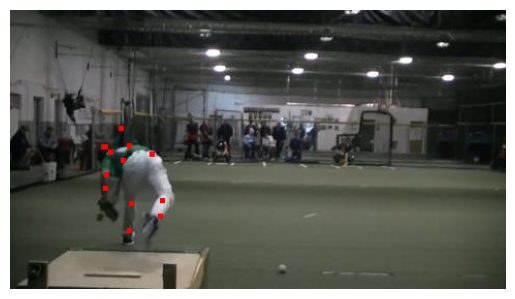

In [4]:
sample_idx = 20
sample_name = sample_names[sample_idx]
label = scipy.io.loadmat(PA_labels_path + sample_name + ".mat")
xs = label["x"]
ys = label["y"]
visibilities = label["visibility"]

for i, frame_name in enumerate(sorted(os.listdir(PA_samples_path + sample_name))):
    frame = plt.imread(PA_samples_path + sample_name + "/" + frame_name).copy()
    
    frame_xs = xs[i]
    frame_ys = ys[i]
    frame_vs = visibilities[i]
    
    for x, y, vs in zip(frame_xs, frame_ys, frame_vs):
        x = np.round(x).astype(int)
        y = np.round(y).astype(int)

        rr, cc = disk((y, x), 3)
        frame[rr, cc] = [255, 0, 0]
            
    plt.imshow(frame)
    plt.axis('off')
    plt.savefig(f'./imgs/{i + 1}.png', bbox_inches='tight', pad_inches=0)


In [12]:
num_samples = 0
num_frames = 0

for sample_name in sample_names:
    label = scipy.io.loadmat(PA_labels_path + sample_name + ".mat")
    action_type = label["action"][0]
    
    if action_type in {"baseball_pitch", "bench_press", "sit_ups"}:
        num_samples += 1
        num_frames += label["nframes"][0, 0]
        
print(num_samples)
print(num_frames)

307
26036


In [11]:
label["nframes"][0, 0]

62